<a href="https://colab.research.google.com/github/rrl7012005/Scikit-Learn-ClassicalML-Course/blob/main/Unsupervised_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clustering

##Problem Statement

We will use the iris flower datasets available in sci kit learn which contain 150 flowers that belong to 3 species. We will try several different algorithsm

In [ ]:
!pip install opendatasets

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import opendatasets as od
import os
import plotly.express as px

In [ ]:
sns.set_style('darkgrid')

iris_df = sns.load_dataset('iris')

iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


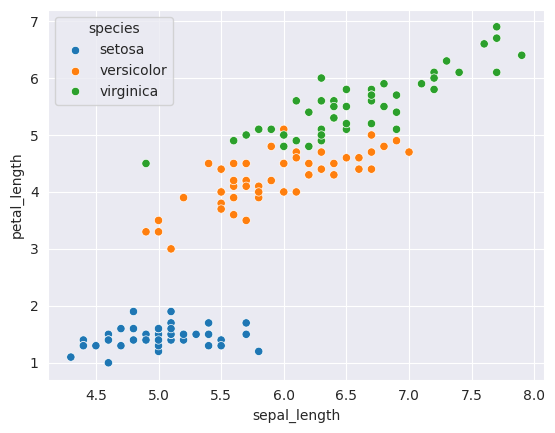

In [ ]:
sns.scatterplot(data=iris_df, x='sepal_length', y='petal_length', hue='species');


In [ ]:
numeric_cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
X = iris_df[numeric_cols] #our input dataset

print(numeric_cols)
X

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


##K-means clustering

When the number of samples is very large (many thousands), use mini-batch K-means. So whatever results we get from each batch use that as the starting point for the next batch.

In [ ]:
from sklearn.cluster import KMeans

#Initialization is kmeans++
model = KMeans(n_clusters=3, random_state=42)
model.fit(X)
model.cluster_centers_ #gives coordinates for the center

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [ ]:
preds = model.predict(X)
preds #predict clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

Now plot the cluster centers for 2 of the features

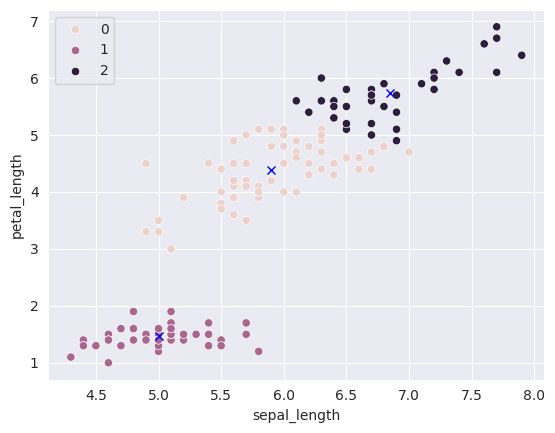

In [ ]:
sns.scatterplot(data=X, x='sepal_length', y='petal_length', hue=preds);
centers_x, centers_y = model.cluster_centers_[:,0], model.cluster_centers_[:,2]
plt.plot(centers_x, centers_y, 'xb')

**Goodness measures**

We can check the goodness of fit by looking at model.inertia_ which contains the sum of squared distances of samples to their closest cluster center. The lower the better, however you can overfit. As k increases, the inertia decreases.

To determine the optimal k, you can use the elbow method. Find the elbow point where the rate of decrease in inertia slows down signficantly indicating a good balance between number of clusters and clustering quality.

In [ ]:
model.inertia_

78.851441426146

In [ ]:
model = KMeans(n_clusters=6, random_state=42).fit(X)

preds = model.predict(X)

model.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


39.03998724608725

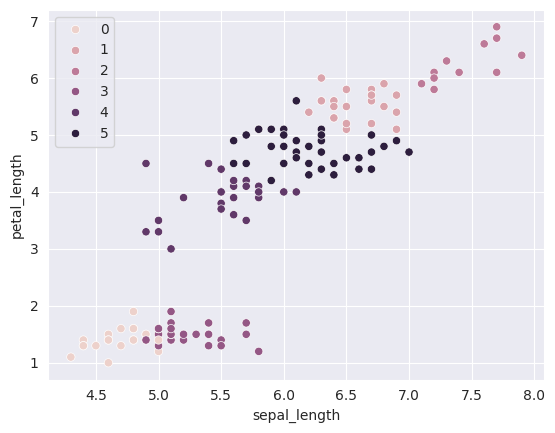

In [ ]:
sns.scatterplot(data=X, x='sepal_length', y='petal_length', hue=preds);

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

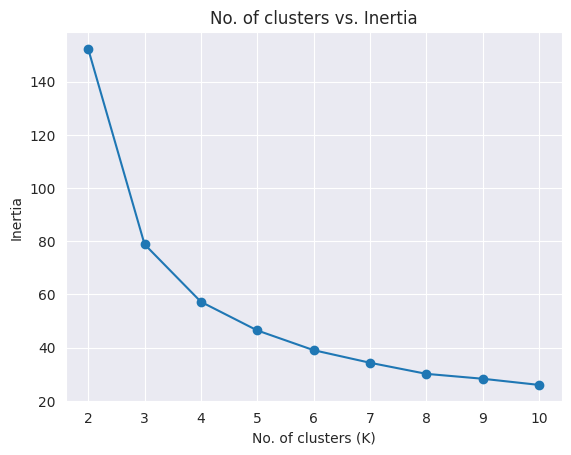

In [ ]:
options = range(2,11)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(X)
    inertias.append(model.inertia_)

plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o')
plt.xlabel('No. of clusters (K)')
plt.ylabel('Inertia');

It seems somewhere between 3 and 5 clusters is optimal. Perhaps 5. Pick before it flattens out.

##Density Based Spatial Clustering of applications with noise (DBSCAN)


This method uses the density of points in a region to form clusters. It has 2 main parameters, epsilon and min_samples which it uses to classy each point as a core point, reachable point or noise point. It marks points in low density regions as outliers.


It does not require specifying number of clusters beforehand and can form vaying shapes and sizes. Epsilon is the maximum distance between 2 points for them to be considered neighbors. min_samples is the number of points required to form a dense region (cluster) a core must have this many points within its epsilon radius.

It is good at identifying outliers which do not naturally belong to any clusters.

However it is very inefficient on large datasets and is heavily sensitive to parameters.


In [ ]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=1.1, min_samples=4)
model.fit(X)

model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Theres no prediction step in DBSCAN, it directly assigns labels to all inputs. You cannot use it to classify new inputs.

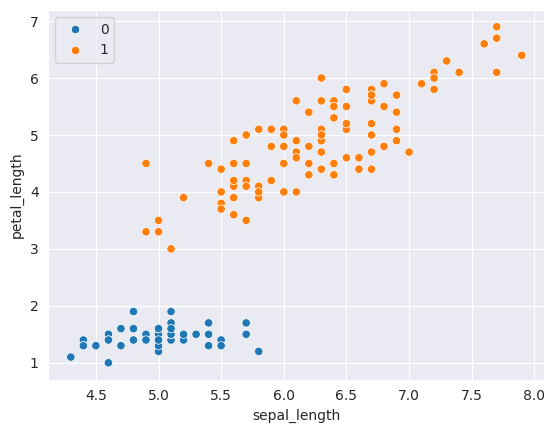

In [ ]:
sns.scatterplot(data=X, x='sepal_length', y='petal_length', hue=model.labels_);

DBSCAN consider nearness between points however K-means considers nearness between points and the mean of the cluster. DBSCAN may be better in some cases.

#Dimensionality Reduction

##Principle Component Analysis

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) #dimension of the lower space
pca.fit(iris_df[numeric_cols])
transformed = pca.transform(iris_df[numeric_cols]) #This is how you get the new data
transformed

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

So now we have cut everything to 2 dimensions.

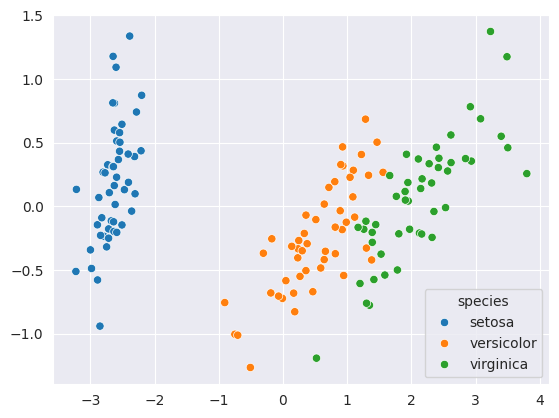

In [ ]:
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=iris_df['species']);

##t-Distributed Stochastic Neighbor Embedding (t-SNE)

Uses a technique of manifold algorithm. It is a method to non-linear dimensionality reduction

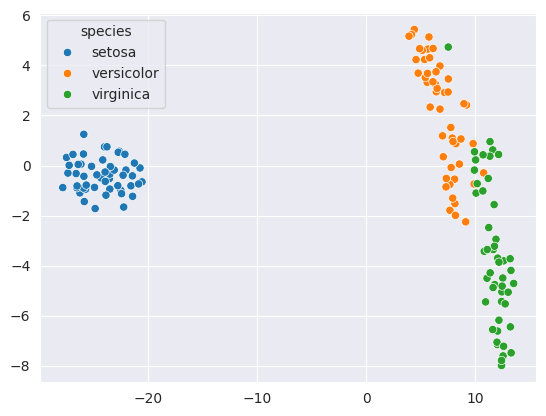

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
transformed = tsne.fit_transform(iris_df[numeric_cols])

sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=iris_df['species']);